In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block" style="background-color: #00b7eb;">
  <span style="color:#2c3e50; font-weight: bold; font-size: 26px;"> Fish Image Classification: Deep Learning (CNN) Approach</span>
</div>

<h3>Information About the Dataset:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
         <br>The dataset consists of image samples of gilt head bream, red sea bream, sea bass, red mullet, horse mackerel, black sea sprat, striped red mullet, trout and shrimp species.
</ul>

<h3>Project Approach:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
  This project aims to classify fish species. In such image-based classification tasks, the Convolutional Neural Network (CNN) structure is generally preferred. CNNs are quite successful in learning spatial relationships and local features in images. The model generally consists of two main parts:
    <br><li>Feature Extraction:
At this stage, distinctive features such as edges, textures, and patterns are extracted from the image through convolution and pooling layers. Thus, the characteristic visual elements of each fish species are learned.</li>
    <li>Classification Layer:
The vectors obtained after feature extraction are transferred to fully connected layers. These layers classify fish species according to the extracted features. In the output layer, the species that the image belongs to is determined based on probability, usually using the softmax activation function.</li><br>
   
</ul>

<h3>Purpose of the Project:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
The aim of this project is to classify fish species accurately using CNN and to increase the generalization ability of the model. CNN, which is successful in learning local features in image data, can thus recognize examples outside of the training data. However, early stopping and dropout techniques were applied to prevent the risk of overfitting. In addition, hyperparameter optimization was performed to increase model performance.
</ul>

<a class="anchor" id="import"></a>

## <span style="color:#FA8072">  Importing Libraries </span> <a class="anchor" id="import_libraries"></a>

In [ ]:
!pip install scikeras
!pip install keras-tuner
!pip install opencv-python
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 156.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import collections

import warnings
warnings.filterwarnings("ignore")

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier



from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Rescaling, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.initializers import RandomNormal, RandomUniform, GlorotUniform, GlorotNormal, HeNormal
from keras.optimizers.schedules import ExponentialDecay
from keras_tuner import RandomSearch, GridSearch, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Reading the Dataset </span> <a class="anchor" id="load_data"></a>

In [ ]:
label = []
path = []
fish_dir = '/content/drive/MyDrive/ColabNotebooks/fishClassifictions/archive/Fish_Dataset/Fish_Dataset'

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
This code determines the file paths and the corresponding class labels of the fish photos. Files with the .png extension and the labels of these files are added to the lists. Then, this data is saved in a pandas DataFrame with the path and label columns. Thus, the fish photos are labeled and ready for model training or analysis.
    <br><br> In summary:  With this code, I created a pandas DataFrame containing the file paths and labels of fish photos.
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Exploratory Data Analysis </span> <a class="anchor" id="load_data"></a>

In [ ]:
# data adlı veri çerçevesinin kaç satır ve kaç sütundan oluştuğunu ekrana yazdırır
print(f" Count of Rows : {data.shape[0]} \n Count of Columns : {data.shape[1]} ")

# data.shape[0]: Veri çerçevesindeki toplam satır sayısını(9000) ifade eder
# data.shape[1]: Veri çerçevesindeki toplam sütun sayısını(2) ifade eder

 Count of Rows : 9030 
 Count of Columns : 2 


In [ ]:
# Örnek veri kontrolü ve veri inceleme
print(data.head())
print(f"Toplam Fotoğraf Sayısı: {len(data)}")
print(f"Sınıf Dağılımı:\n{data['label'].value_counts()}")

                                                path          label
0  /content/drive/MyDrive/ColabNotebooks/fishClas...  Red Sea Bream
1  /content/drive/MyDrive/ColabNotebooks/fishClas...  Red Sea Bream
2  /content/drive/MyDrive/ColabNotebooks/fishClas...  Red Sea Bream
3  /content/drive/MyDrive/ColabNotebooks/fishClas...  Red Sea Bream
4  /content/drive/MyDrive/ColabNotebooks/fishClas...  Red Sea Bream
Toplam Fotoğraf Sayısı: 9030
Sınıf Dağılımı:
label
Hourse Mackerel       1017
Red Mullet            1013
Red Sea Bream         1000
Gilt-Head Bream       1000
Sea Bass              1000
Striped Red Mullet    1000
Black Sea Sprat       1000
Shrimp                1000
Trout                 1000
Name: count, dtype: int64


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
There are a total of 9 different fish species in our dataset, and there are 1000 photos of each species. <br>This indicates that each class has equal number of observations and is a balanced data set.
    <br>
</p>


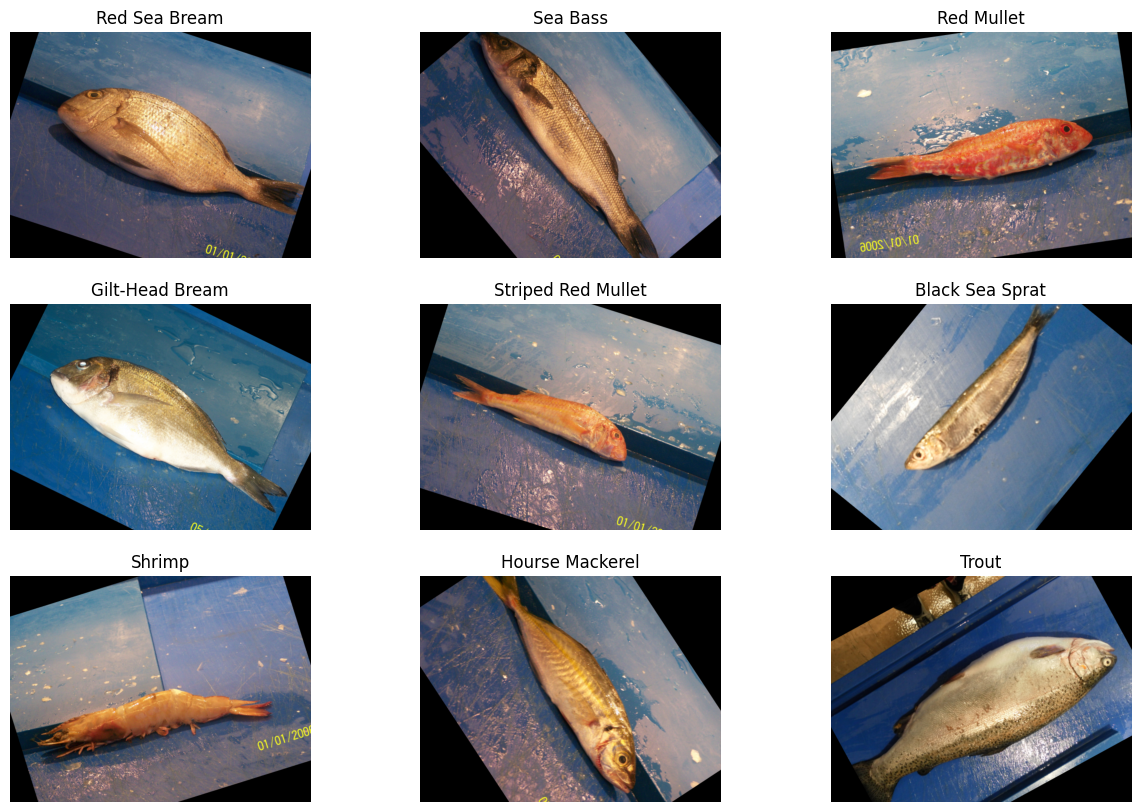

In [ ]:
# Her tür balıktan yalnızca bir örnek almak için veriyi gruplama
unique_fish = data.drop_duplicates(subset=['label'])

# Görselleştirme
plt.figure(figsize=(15, 10))

for i, (index, row) in enumerate(unique_fish.iterrows()):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(row['path'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(row['label'])
    plt.axis('off')

plt.show()

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Splitting the Dataset </span> <a class="anchor" id="load_data"></a>

In [ ]:
# Veriyi eğitim ve test veri setlerine ayırır.
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=53)

print(train_data.shape)  # Eğitim veri setinin satır ve sütun sayısını gösterir.
print(test_data.shape)   # Test veri setinin satır ve sütun sayısını gösterir.

(7224, 2)
(1806, 2)


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  <span style="font-weight: bold;"></span>  The Dataset, Firstly <span style="font-weight: bold;">train_test_split</span> using test_size=0.2,  divided into 80% training and 20% testing. Later <span style="font-weight: bold;"> ImageDataGenerator</span> using , I separated 20% of the training data as the validation set (validation_split=0.2). In this way:<br><br>
  • <span style="font-weight: bold;">Training Set (%64):</span>It is used for the model to learn. The model learns the relationships between classes from this data and trains itself.<br><br>
  • <span style="font-weight: bold;">Validation Set (%16):</span>The performance of the model is monitored during training. Each training cycle shows how well the model is learning and checks for over-learning. Without a validation set, the model cannot tell if it is memorizing, which can lead to poor results on new data.<br><br>
  • <span style="font-weight: bold;">Test Set (%20):</span>After training is complete, it is used to measure the success of the model on new and previously unseen data.<br><br>
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;"> <br>
  • <span style="font-weight: bold;">random_state=53:</span>It provides the same data split in each run, so the results are consistent and the same training and test sets are obtained each time.<br>The number itself does not carry any special meaning; any other number can be used.<br><br>
  • <span style="font-weight: bold;">shuffle=True:</span>It randomly shuffles the data, thus preventing the model from depending on sequential data, which increases the generalization ability of the model. It ensures homogeneous distribution of the data.<br><br>

</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
        Alternatively, to separate the training and validation sets, I could manually split the dataset into three parts (training, validation, testing). However, this method would make the process more complicated. Instead, I found that automatically splitting the validation set using the ImageDataGenerator with the validation_split parameter is a more practical and faster method, so I preferred this method.
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Preprocessing and Dataflow Creation</span> <a class="anchor" id="load_data"></a>

In [ ]:
# ImageDataGenerator Nesnelerinin Oluşturulması(train_generator, test_generator)
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
   With this code two <span style="font-weight: bold;">ImageDataGenerator object</span> created: train_generator is used for training and validation set, and test_generator is used for test data.<br>These objects normalize the data and transform it into a format that the model can understand. <span style="font-weight: bold;">preprocessing_function=preprocess_input parameter</span>, ensures that the data is normalized, making it suitable for the model to learn.<br>
    I also separated 20% of the training data as validation set by using validation_split=0.2. Thus, both training and validation sets were created from the same train_data set.<br>
</p>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  <span style="font-weight: bold;"> Data Augmentation</span><br>At this point, I did not do any data augmentation on the data, I just did the normalization process.<br>
     • If I wanted to augment the data, I could use additional parameters of ImageDataGenerator such as rotation_range, width_shift_range, height_shift_range etc. As seen below.⬇️<br><br>

</ul>

In [ ]:
# train_generator = ImageDataGenerator(
#    preprocessing_function=preprocess_input,
#    validation_split=0.2,
#    rotation_range=30,          # Döndürme
#    width_shift_range=0.2,      # Yatay kaydırma
#    height_shift_range=0.2,     # Dikey kaydırma
#    zoom_range=0.2,             # Yakınlaştırma
#    horizontal_flip=True        # Yatay çevirme
#)

In [ ]:
# Veri Akışlarının Oluşturulması (flow_from_dataframe)
x_train = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=53, subset='training')

x_val = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=53, subset='validation' )

x_test = test_generator.flow_from_dataframe(dataframe=test_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5780 validated image filenames belonging to 9 classes.
Found 1444 validated image filenames belonging to 9 classes.
Found 1806 validated image filenames belonging to 9 classes.


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  This code uses train_generator and test_generator objects with certain parameters:<br><br>
  •  <span style="font-weight: bold;">x_train:</span> It provides the flow of data that the model will use in the training process.<br><br>
  •  <span style="font-weight: bold;">x_val:</span> Provides a stream of data separated as a validation set.<br><br>
  •  <span style="font-weight: bold;">x_test:</span> It creates a data flow so that the model can evaluate its performance on the test set.<br><br>
   📌 These flows ensure that the data is brought into a suitable format that the model can understand and process.
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  I examined the parameters used while creating data flows. The parameters are as follows:<br><br>
  •  <span style="font-weight: bold;">target_size=(224, 224):</span> Resizes images to 224x224 pixels.<br><br>
  •  <span style="font-weight: bold;">color_mode='rgb':</span> Processes images in RGB format.<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 The target variables in my dataset, namely the labels, are organized as categorical and multi-class. In order for the model to learn these classes, the labels need to be converted to a numerical format. At this point, the "class_mode" parameter comes into play and offers two options for multi-class labels: categorical ve sparse:<br><br>
   •  <span style="font-weight: bold;">class_mode='categorical':</span>It represents class labels in one-hot encoding format. That is, each class is expressed by a vector that only specifies that class. In this case, I need to use categorical_crossentropy as the loss function. <br><br>   <span style="font-weight: bold;">class_mode='sparse':</span> Classes are represented as integers. Each class corresponds to a numerical value such as 0, 1, 2, ... This method saves memory and increases computational speed. <br><br>
   📌 "In this project, I converted the model's labels to one-hot encoding format using the class_mode='categorical' option. Accordingly, I preferred the categorical_crossentropy loss function during the compilation phase of the model."<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
     •  <span style="font-weight: bold;">batch_size=32:</span>The model processes data in batches of 32. In other words, at each step, the model takes 32 images and performs training on these images. The reason I use this method is that processing the entire dataset at once requires a large amount of memory. Therefore, processing the data in small batches allows for more efficient use of memory.<br><br>
<br><br>
     <span style="font-weight: bold;">Small batch_size (16):</span>It can make the model learn better, but the training time will be longer.<br><br>
      <span style="font-weight: bold;">Large batch_size (128 or more):</span>  It provides faster training, but the learning capacity of the model may decrease and the risk of overfitting increases.<br><br>
      <span style="font-weight: bold;">Maintaining Balance:</span> According to my research and learnings, a balanced value such as 32 or 64 is generally preferred in terms of training time and performance.<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
    •  <span style="font-weight: bold;">shuffle=True/False:</span> <br><br>
     <span style="font-weight: bold;">shuffle=True:</span> >It randomly mixes the training and validation data. This ensures that the data is distributed uniformly and helps the model learn each class equally, reducing the risk of memorization.<br><br>
    <span style="font-weight: bold;">shuffle=False:</span> Test data is not mixed. This allows an objective assessment of the model's actual performance.
    </p>

📌Importance of weights: The learning process is the model’s attempt to reduce the error rate (loss). The model aims to minimize this error by adjusting the weights at each iteration (epoch). In other words, the goal throughout the learning process is to increase the performance of the model by finding the most appropriate values of the weights.

 <p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
    •  <span style="font-weight: bold;">subset='training'/'validation':</span>
separates training and validation data using the train_generator object.
    </p>

In [ ]:
 # Sınıf dağılımını yazdırmak için fonksiyon
def print_class_distribution(dataset, dataset_name):
    train_labels = dataset.classes
    class_counts = collections.Counter(train_labels)
    print(f"{dataset_name} Class Distribution: {class_counts}")

    labels_map = {v: k for k, v in dataset.class_indices.items()}
    for class_index, count in class_counts.items():
        print(f"Class '{labels_map[class_index]}': {count}")

In [ ]:
# Eğitim, doğrulama ve test veri setlerinin sınıf dağılımı
print_class_distribution(x_train, "Training")
print_class_distribution(x_val, "Validation")
print_class_distribution(x_test, "Test")

Training Class Distribution: Counter({0: 669, 2: 656, 8: 653, 4: 653, 5: 645, 6: 634, 3: 630, 1: 624, 7: 616})
Class 'Hourse Mackerel': 656
Class 'Striped Red Mullet': 616
Class 'Gilt-Head Bream': 624
Class 'Red Mullet': 630
Class 'Shrimp': 634
Class 'Black Sea Sprat': 669
Class 'Trout': 653
Class 'Red Sea Bream': 653
Class 'Sea Bass': 645
Validation Class Distribution: Counter({3: 182, 6: 171, 7: 167, 5: 162, 2: 162, 4: 155, 8: 154, 1: 147, 0: 144})
Class 'Shrimp': 171
Class 'Red Sea Bream': 155
Class 'Black Sea Sprat': 144
Class 'Striped Red Mullet': 167
Class 'Sea Bass': 162
Class 'Trout': 154
Class 'Gilt-Head Bream': 147
Class 'Hourse Mackerel': 162
Class 'Red Mullet': 182
Test Class Distribution: Counter({1: 229, 7: 217, 3: 201, 2: 199, 6: 195, 5: 193, 8: 193, 4: 192, 0: 187})
Class 'Red Sea Bream': 192
Class 'Gilt-Head Bream': 229
Class 'Shrimp': 195
Class 'Striped Red Mullet': 217
Class 'Sea Bass': 193
Class 'Black Sea Sprat': 187
Class 'Hourse Mackerel': 199
Class 'Trout': 193


In [ ]:
display(x_train.class_indices)
display(x_val.class_indices)
display(x_test.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Creating the Model (CNN) </span> <a class="anchor" id="load_data"></a>


In [ ]:
# Modelin Oluşturulması (CNN)
def create_model(optimizer='adam', dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        # 1. Normalizasyon (Rescaling)
        tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),

        # 2. Birinci Konvolüsyon Bloğu
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),

        # 3. İkinci Konvolüsyon Bloğu
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),

        # 4. Üçüncü Konvolüsyon Bloğu
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # 5. Düzleştirme Katmanı
        tf.keras.layers.Flatten(),

        # 6. Tam Bağlantılı Katmanlar (Parametreler Aynı)
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        # 7. Çıkış Katmanı
        tf.keras.layers.Dense(9, activation='softmax')
    ])

    # 8. Modelin Derlenmesi
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


<h3># 1. Normalizasyon (Rescaling)</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
       With the first layer of the model, Rescaling(1./255), pixel values in the range of 0-255 are scaled to the range of [0, 1]. This process allows the model to learn faster and more balanced. Normalized data allows for more accurate calculation of gradients and increases the generalization ability of the model. The structure of the image does not change; it is only brought to a more mathematically appropriate format.<br><br>
   
</ul>

<h3>#2. First Convolution Block </h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
   This block is structured for the purpose of extracting low-level features (edge, texture, color gradient, etc.) from the image.

  • Conv2D(32, (3,3), activation='relu', padding='same'): Local feature extraction is performed using 32 3x3 filters. Input and output dimensions are preserved with ‘same’ padding.

  • BatchNormalization(): The stability of learning is ensured by normalizing the activations.

• MaxPooling2D((2,2)): The spatial dimension is halved by the 2x2 pooling operation, which reduces the computational cost and prevents the loss of important information.

   • Dropout(rate): Some neurons are randomly disabled during training to prevent overfitting.
   <br><br>
  
</ul>

<h3># 3. Second Convolution Block</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
  The second convolution block increases the number of filters to learn more complex features and helps the model recognize more abstract patterns. This block allows more complex patterns to be added to the simple features learned in the first block. In the classification of fish species, details such as fin shapes and color transitions can be learned in this layer.
  
   • Conv2D(64, (3, 3), activation='relu', padding='same'): Learns more complex features using 64 filters. 3x3 filters capture subtle patterns in visual data. ReLU activation function helps learn nonlinear relationships and reduces the gradient vanishing problem.

   • BatchNormalization(): Normalizes the activations, accelerates and stabilizes learning. It enables the model to learn faster and more balanced.

   • MaxPooling2D((2, 2)): Reduces image dimensions by half, preserving important information while reducing computational load. It also provides resilience to environmental changes.

• Dropout(dropout_rate): Prevents over-learning. Randomly disables neurons during training, which increases the generalization ability of the model.
  <br><br>
</ul>

<h3>#4. Third Convolution Block</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
This block is used to learn more complex features. Building on the simple patterns learned in the previous block, it begins to recognize more detailed and specific features of fish species.

• Conv2D(128, (3, 3), activation='relu', padding='same': In this layer, 128 filters are used. This allows deeper and more complex features to be learned. More detailed features of the fish species or the distinct structure of the object are recognized. ReLU activation learns non-linear relationships and helps the model to be more flexible. Using padding='same' ensures that the image size is preserved, i.e. the output dimensions remain the same as the input.

• BatchNormalization(): Normalizes the output of each convolution block, thus making the training process more stable and increasing the learning speed.

• MaxPooling2D((2, 2)): Halves the image dimensions in a 2x2 window. This allows the model to learn more general features and reduces the computational load.

<br><br>
</ul>

<h3># 5. Flatten Layer</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
The flatten() layer transforms the 3D data obtained from the previous convolution and pooling layers into a single 1D vector.

Images may initially be in 3D (height, width, number of channels), but in order for fully connected (dense) layers to work with this data, the data must be converted into a one-dimensional array. The Flatten layer fulfills this requirement by converting the 3D data into a vector.
<br><br>
</ul>

<h3># 6. Fully Connected Layers)</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
In CNN architecture, convolutional and pooling layers extract meaningful features from the data. After these abstract features are flattened, the classification process is performed with dense layers.<br><br>
• Dense(256): The first fully connected layer contains 256 neurons. It works with the ReLU activation function and this layer processes the learned features and makes them ready for classification.

• Dense(128) (2 times): The generalization ability of the model is increased with two smaller layers. Again, ReLU activation is used.

After each dense layer:

• BatchNormalization is applied. This allows the model to learn faster and more balanced.

• Dropout (in the first two dense layers): During training, some neurons are randomly turned off to prevent overfitting.

With these fully connected layers, the model can evaluate the extracted visual features more meaningfully and make a more precise distinction between fish species.

<br><br>
</ul>

<h3> # 7. Output Layer</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
The output layer of the model is designed to classify fish species and consists of 9 neurons since there are 9 different fish species. The softmax activation function used in this layer normalizes the estimated values ​​​​of each class between 0 and 1 and equalizes the sum of these values ​​​​to 1. Thus, the model generates probabilities for each fish species and performs the prediction process by selecting the class with the highest probability. In the CNN architecture, the visual features extracted by the previous convolutional layers are flattened and transferred to fully connected layers, and this information is transmitted to the output layer to perform the classification.

 <br><br>
</ul>

  <h3> # 8. Compiling the Model</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">

"model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])" function ensures that the created model is ready for training. At this stage, the model's weight update method (optimizer), error measurement method (loss function) and performance evaluation metric (metrics) are determined.
<br><br>
• 1. optimizer='adam' This parameter determines how the model will update the weights during the training process.

Adam (Adaptive Moment Estimation) algorithm is selected. This algorithm provides faster and more stable learning by combining momentum and adaptive learning rates.
<br><br>
• 2. loss='categorical_crossentropy' It is the loss function that measures the difference between the model's predicted output and the actual value.
<br><br>
Suitable for multi-class classification problems (There are 9 different fish species classes in this project).

This function allows the model to make more accurate predictions by maximizing the probability of belonging to the correct class.
<br><br>


• 3. metrics=['accuracy']' Used to evaluate the success of the model in the training and validation processes.
<br><br>

 accuracy: This generally measures how many of the classes the model predicted were correct. So, if the model correctly classified 89 out of 100 images, its accuracy is considered to be 89%.
 <br><br>
</ul>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Creating Callback Objects </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 Callback functions are tools that enable us to manage the process by stepping in when certain situations occur during model training.<br> They are used for purposes such as preventing overfitting, stopping training early, or adjusting the learning rate.<br>
   These callbacks make the necessary checks and adjustments to improve training after each epoch is completed.
 <br>
    </p>

In [ ]:
# Erken Durdurma (Early Stopping) Kullanımı
early_stopping = tf.keras.callbacks.EarlyStopping(
                               monitor='val_loss',
                               patience=7,
                               verbose=1,
                               restore_best_weights=True)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
To prevent over-learning, use the EarlyStopping function from the callbacks module in the TensorFlow Keras library (tf.keras).<span style="font-weight: bold;">early_stopping</span> I created an object called . This object monitors the validation performance of the model during training and stops training when there is no improvement.<br><br>
Explanations of the entered parameters:<br><br>
   •  <span style="font-weight: bold;">monitor='val_loss':</span> Specifies the criterion based on which early stopping will be performed. In this case, the validation loss (val_loss) is monitored.<br><br>
    📌 val_loss is a loss value that measures the difference between the predicted values ​​and the actual values ​​for the validation data. This value indicates the performance of the model on the validation set.<br><br>
       •  <span style="font-weight: bold;">patience=7:</span> If the validation loss does not improve (decrease) for 7 epochs, training is stopped. This aims to stop the model before it starts over-learning.<br><br>
    •  <span style="font-weight: bold;">verbose=1:</span>  It gives an information message when early stopping is activated.<br><br>
   •  <span style="font-weight: bold;">restore_best_weights=True:</span> It restores the weights from when the model performed best, so the model remains at its best on the validation set.<br><br>
    </p>

In [ ]:
# Öğrenme Oranı Planlaması (Learning Rate Scheduler)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
In this code using LearningRateScheduler function <span style="font-weight: bold;">lr_schedule </span> I created a callback object called . I set this object to dynamically change the learning rate for each epoch.<br><br>    
   In the code," lambda epoch: 1e-3 * 10**(-epoch / 20) " part determines how the learning rate will be updated at each epoch.<br><br>
    •  <span style="font-weight: bold;">1e-3:</span> Initially, I set the learning rate to 0.001.<br><br>
    •  <span style="font-weight: bold;">10**(-epoch / 20):</span> This expression indicates that the learning rate will decrease exponentially at each epoch. That is, the learning rate decreases by a factor of 10 at every 20 epochs. <br><br>
    📌According to my experience, Learning Rate Scheduler can help prevent over-learning, but its main purpose is to make the learning process more efficient and stable.<br><br>  
    </p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> GPU Control </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
📌 GPU enables faster training of deep learning models.<br> .<br>  
    </p>

In [ ]:
device_name = tf.test.gpu_device_name()  # Mevcut bir GPU cihazı olup olmadığını kontrol eder ve varsa GPU cihazının adını döndürür.
if "GPU" not in device_name:  # Eğer döndürülen cihaz adı içerisinde "GPU" ifadesi yoksa...
    print("GPU device not found")   # Kullanıcıya "GPU cihazı bulunamadı" mesajını yazdırır.
print('Found GPU at: {}'.format(device_name))   # Eğer GPU bulunmuşsa, bulunan GPU'nun adı yazdırılır.

GPU device not found
Found GPU at: 


In [ ]:
tf.test.is_gpu_available()  # GPU kullanılabilir mi kontrol eder, eğer varsa GPU'yu kullanarak işlemleri hızlandırır.

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Training the Model (Before Hyperparameter Tuning (Random Search)):</span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 In the "Training the Model" code, the model training process takes place in the following steps:<br><br>    
    •  <span style="font-weight: bold;">with tf.device('/GPU:0'):</span> This line makes TensorFlow use the GPU. If the GPU is available, the operations in this code block will be done on the GPU, thus speeding up the training process.<br><br>
    •  <span style="font-weight: bold;">initial_model = create_model()</span> create_model() A model object named initial_model is created by calling the function.<br><br>
    •  <span style="font-weight: bold;">history = initial_model.fit(...)</span> The fit method starts the training process of the model and uses the following parameters:<br><br>
    <span style="font-weight: bold;">x_train:</span>Training data.<br><br>
    <span style="font-weight: bold;">validation_data = x_val:</span> Validation data is used to monitor the validation performance of the model at the end of each epoch.<br><br>
    <span style="font-weight: bold;">epochs=30:</span>  The model will make a full pass over the training data 30 times. That is, the model will perform the learning process using the entire data 30 times.<br><br>
    <span style="font-weight: bold;">verbose=1:</span> It shows training and validation metrics at the end of each epoch during training.<br><br>
    <span style="font-weight: bold;">callbacks=[lr_schedule, early_stopping]:</span> Callback functions such as lr_schedule and early_stopping are used to perform certain operations (early stopping, learning rate adjustment) during the training process.<br><br>
    </p>

In [ ]:
# Modelin Eğitilmesi (RandomSearch öncesi)
with tf.device('/GPU:0'):
    initial_model = create_model()
    history = initial_model.fit(x_train,
                                validation_data=x_val,
                                epochs=30,
                                verbose=1,
                                callbacks=[lr_schedule, early_stopping])

Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 3920s 22s/step - accuracy: 0.5106 - loss: 1.4982 - val_accuracy: 0.0997 - val_loss: 62.1174 - learning_rate: 0.0010
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 143s 790ms/step - accuracy: 0.8433 - loss: 0.4685 - val_accuracy: 0.1260 - val_loss: 236.6286 - learning_rate: 8.9125e-04
Epoch 3/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 146s 807ms/step - accuracy: 0.9291 - loss: 0.2033 - val_accuracy: 0.0997 - val_loss: 404.5833 - learning_rate: 7.9433e-04
Epoch 4/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.9769 - loss: 0.0816 - val_accuracy: 0.1129 - val_loss: 116.2668 - learning_rate: 7.0795e-04
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.9846 - loss: 0.0539 - val_accuracy: 0.5976 - val_loss: 3.9220 - learning_rate: 6.3096e-04
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 149s 825ms/step - accuracy: 0.9810 - loss: 0.0581 - val_accuracy: 0.1066 - val_loss: 49.1735 - learning_rate: 5.6234e-04
Epoch 7/30
181/181 ━━━━━━━━━━━━━━━━━━

In [ ]:
#Yardımcı Fonksiyon:
#Bu fonksiyon (get_best_epoch_details) modelin eğitim sürecinde en düşük doğrulama kaybına (val_loss) ulaştığı
#epoch'un (en iyi epoch) detaylarını döndürür.

def get_best_epoch_details(history):
    val_losses = history.history['val_loss']
    min_val_loss_index = val_losses.index(min(val_losses))
    best_epoch = min_val_loss_index + 1

    epoch_details = {}
    for key in history.history.keys():
        epoch_details[key] = history.history[key][min_val_loss_index]

    epoch_details['best_epoch'] = best_epoch
    return epoch_details

In [ ]:
#Bu kod, eğitim sürecinde modelin en iyi performans gösterdiği(en küçük loss değeri) değeri epoch (yineleme) ile ilgili bilgileri almak
#ve bu bilgileri ekrana yazdırmak amacıyla kullanılır.
best_epoch_details = get_best_epoch_details(history)
print(f"Best epoch details: {best_epoch_details}")

Best epoch details: {'accuracy': 0.9977508783340454, 'loss': 0.011566120199859142, 'val_accuracy': 0.9335179924964905, 'val_loss': 0.26477038860321045, 'learning_rate': 0.0003548133827280253, 'best_epoch': 10}


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 As can be seen, early stopping was applied at the end of the 17th epoch and the best performance of the model was determined as epoch 10. In this epoch, 99.8% accuracy was achieved on the training set and 93.4% accuracy on the validation set. These results show that my model showed high accuracy on the validation set and did not experience overfitting (overlearning) problems.

The learning process of my model progressed stably and the results were preserved in the best epoch thanks to early stopping.<br><br>
    </p>

In [ ]:
#Yardımcı Fonksiyon:
#Bu fonksiyonun görevi, göstermek istediğimiz metrikleri girdiğimizde bize bu metriklerin train süreçini gösterir.

def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()

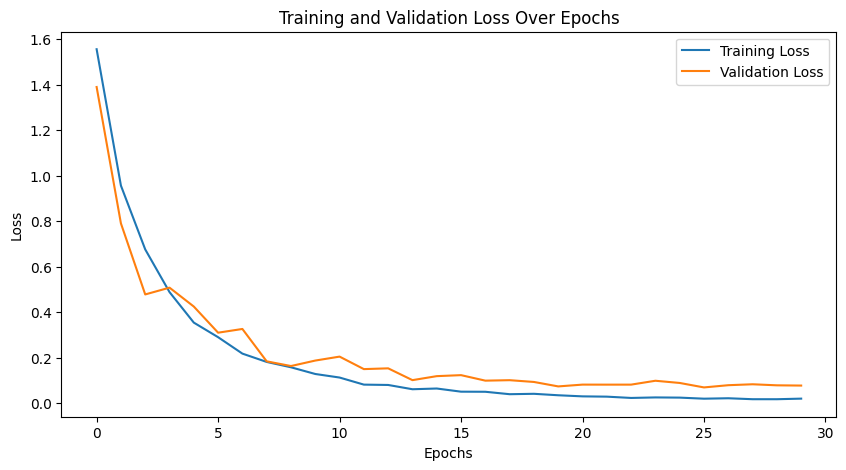

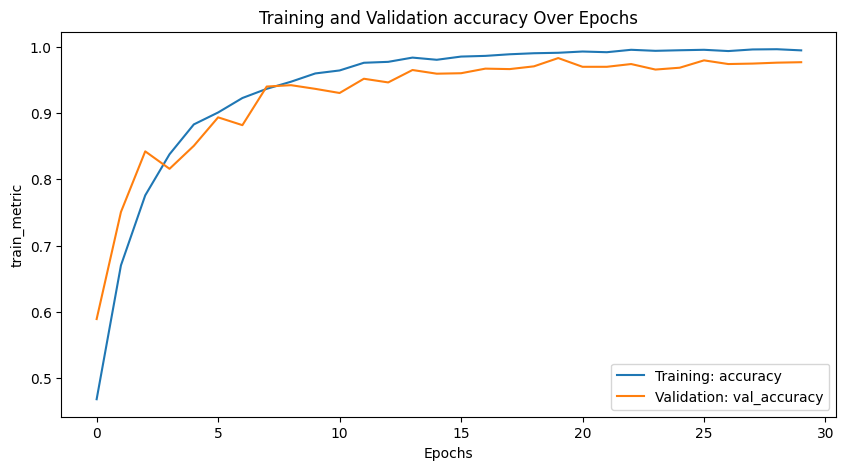

In [ ]:
#Modelin eğitim sürecinde kaydedilen performans bilgilerini grafiksel olarak gösterir.
plot_training_history(history)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 In these graphs, the changes in loss and accuracy value during the training and validation process of the model are observed. <br><br>
    In the Training and Validation Loss Over Epochs and Training and Validation Accuracy Over Epochs graphs, small fluctuations in both losses and accuracy are observed in some epochs. These fluctuations may be caused by optimizations made by the model during the learning process (e.g., batch normalization or dropout) and are completely normal.<br><br>
    As the epochs progress, it is seen that the losses on both training and validation sets decrease and almost stabilize. Similarly, the accuracy values ​​increase and stabilize at close levels. This shows that the model performs well on both training and validation data and does not overfit. I verified that the model can generally learn and generalize well.<br><br>  
    </p>
    
    

In [ ]:
test_result = initial_model.evaluate(x_test, verbose=0)
print('Test loss is : ',test_result[0])
print('Test accuracy is : ',test_result[1])

Test loss is :  0.234761044383049
Test accuracy is :  0.9285714030265808


In [ ]:
initial_model.save_weights("my_model.weights.h5")

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  This code is used to measure the performance of the model on the test dataset and to show this accuracy. Thus, the overall performance of the model on the test data can be evaluated.<br><br>
    Explanations of the entered parameters:<br><br>
        •  <span style="font-weight: bold;">initial_model object,</span>  calculates the performance of the model on the test data using the evaluate method and returns the loss and accuracy values.<br><br>
        •  <span style="font-weight: bold;">verbose=0 parameter,</span> prevents any progress bars or detailed output from being written to the screen during the evaluation process.<br><br>
    " test_result " is a variable in the form of a list. This list contains values ​​that represent the performance of the model on the test dataset.<br><br>
        •  <span style="font-weight: bold;">test_result[0]:</span> This is the loss value on the test data, that is, the value that measures the difference between the results predicted by the model and the actual values.<br><br>
     •  <span style="font-weight: bold;">test_result[1]:</span> This is the accuracy value on the test data. It shows how many examples the model correctly predicted in the test set as a percentage.<br><br>     
    </p>

57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step


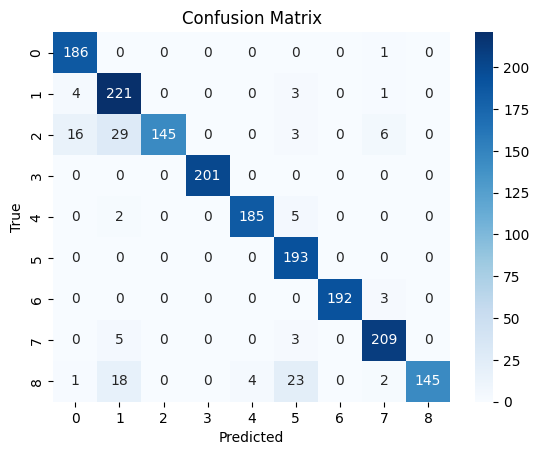

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       187
           1       0.80      0.97      0.88       229
           2       1.00      0.73      0.84       199
           3       1.00      1.00      1.00       201
           4       0.98      0.96      0.97       192
           5       0.84      1.00      0.91       193
           6       1.00      0.98      0.99       195
           7       0.94      0.96      0.95       217
           8       1.00      0.75      0.86       193

    accuracy                           0.93      1806
   macro avg       0.94      0.93      0.93      1806
weighted avg       0.94      0.93      0.93      1806



In [ ]:
# Confusion Matrix ve Classification Report
y_pred = initial_model.predict(x_test)  # Test verisi üzerindeki tahminlerin alınması

y_pred_classes = np.argmax(y_pred, axis=1) # En yüksek olasılığa sahip sınıfı almak (her örnek için tahmin edilen sınıf)

y_true_classes = x_test.classes  # Gerçek sınıf değerlerini almak

conf_mat = confusion_matrix(y_true_classes, y_pred_classes) # Karmaşıklık matrisini oluşturmak

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d') # Karmaşıklık matrisinin görselleştirilmesi
plt.xlabel('Predicted')  # X eksenine tahmin edilen sınıflar etiketi eklemek
plt.ylabel('True')  # Y eksenine gerçek sınıflar etiketi eklemek
plt.title('Confusion Matrix')   # Grafiğin başlığını eklemek

plt.show()

print(classification_report(y_true_classes, y_pred_classes)) # Sınıflandırma raporunu ekrana yazdırmak (precision, recall, f1-score, support)


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 Using the Confusion matrix, I was able to observe how accurately and incorrectly the model predicted each class. <br>This table shows the performance of the model across classes in detail. <br><br>
    <span style="font-weight: bold;">
    🚀 According to the accuracy value as the evaluation metric of my model, this rate is seen as 93%. This means that my model was able to correctly classify 93 out of 100 fish images. <br> This accuracy rate shows that my model generally recognizes fish species correctly to a large extent and has a good generalization capacity.<br> In other words, it performs effectively in the classification task.</span> <br><br>    
   📌 Precision, Recall, F1-Score values ​​are also quite high for each class. This shows that the model can predict each class accurately and balancedly.<br><br>  
    </p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Hyperparameter Tuning </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
📌 In the hyperparameter tuning process, I used the Random Search method to minimize the training time of the model. Random Search searches by selecting random examples from the hyperparameter space and is generally preferred when there is a certain time constraint or when the search space is very large. <br><br>  
     •  <span style="font-weight: bold;">1. Random Search:</span>When the search space is very large, results can be obtained in a shorter time by random selection. However, there is no guarantee of reaching the optimum solution: Since only random sampling is done in the parameter space, some important regions may be ignored and the optimum solution may not be reached.<br><br>
       <span style="font-weight: bold;"
           <span style="font-weight: bold;">   
    ✅No significant improvement was observed in the model in the hyperparameter searches performed with Random Search. This is an expected result of Random Search, since this method usually scans the search space randomly and finding the best hyperparameter combination is not always guaranteed.<br><br>   
    </p>

In [ ]:
# --- Gerekli katmanları eklediğinizden emin olun --------------------------------
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten,
    Dense, BatchNormalization, Dropout
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
# -------------------------------------------------------------------------------

# Hyper-parameter Tuning için CNN tabanlı model
def build_model(hp):
    model = Sequential()

    # 1️⃣ Normalizasyon
    model.add(Rescaling(1. / 255, input_shape=(224, 224, 3)))

    # 2️⃣ Konvolüsyon + Havuzlama bloğu
    model.add(
        Conv2D(
            filters=hp.Choice('conv_filters', values=[32, 64, 128], default=32),
            kernel_size=(3, 3),
            activation='relu',
            padding='same'
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(
        Dropout(
            hp.Float('conv_dropout', min_value=0.1, max_value=0.5, step=0.1)
        )
    )

    # 3️⃣ Düzleştirme – bundan sonrası ANN ile birebir aynı
    model.add(Flatten())

    # 4️⃣ Gizli Dense katmanları (hp-tuning parametreleri korunuyor)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(
            Dense(
                units=hp.Choice(f'units_{i}', values=[64, 128]),
                activation=hp.Choice(f'activation_{i}', values=['relu', 'leaky_relu']),
                kernel_regularizer=l2(
                    hp.Float(f'l2_{i}', min_value=1e-4, max_value=1e-2, sampling='log')
                ),
            )
        )
        model.add(BatchNormalization())
        model.add(
            Dropout(
                hp.Float(
                    f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1
                )
            )
        )

    # 5️⃣ Çıkış katmanı
    model.add(Dense(9, activation='softmax'))

    # 6️⃣ Öğrenme oranı takvimi
    initial_lr = hp.Float(
        'initial_learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'
    )
    lr_schedule = ExponentialDecay(
        initial_learning_rate=initial_lr,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True,
    )

    # 7️⃣ Optimizer seçimi (aynı aralıklar)
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer_choice == 'sgd':
        optimizer = SGD(
            learning_rate=lr_schedule,
            momentum=hp.Float('momentum', 0.0, 0.9, step=0.1),
        )
    else:  # adam
        optimizer = Adam(
            learning_rate=lr_schedule,
            beta_1=hp.Float('beta1', 0.85, 0.99, step=0.01),
            beta_2=hp.Float('beta2', 0.999, 0.9999, step=0.0001),
            epsilon=hp.Float('epsilon', 1e-8, 1e-7, step=1e-8),
        )

    # 8️⃣ Derleme
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model


In [ ]:
random_search_tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    executions_per_trial=1,
    overwrite=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)


In [ ]:
# Eğitim için GPU kullanımı
with tf.device('/GPU:0'):
    random_search_tuner.search(x_train,
                               epochs=30,
                               validation_data=x_val,
                               callbacks=[early_stopping])


Trial 2 Complete [00h 29m 25s]
val_loss: 0.6119131445884705

Best val_loss So Far: 0.6119131445884705
Total elapsed time: 00h 46m 21s


In [ ]:
best_hps = random_search_tuner.get_best_hyperparameters(num_trials=2)

In [ ]:
best_hps_1 = best_hps[0]
best_hps_2 = best_hps[1]

In [ ]:
print(f"Best hyperparameters: {best_hps_1.values}")

Best hyperparameters: {'conv_filters': 64, 'conv_dropout': 0.2, 'num_layers': 3, 'units_0': 64, 'activation_0': 'relu', 'l2_0': 0.002613807343189224, 'dropout_0': 0.30000000000000004, 'initial_learning_rate': 0.0001409438468256163, 'optimizer': 'adam', 'momentum': 0.6000000000000001, 'units_1': 64, 'activation_1': 'relu', 'l2_1': 0.0022790183460427854, 'dropout_1': 0.1, 'units_2': 64, 'activation_2': 'relu', 'l2_2': 0.0001, 'dropout_2': 0.1, 'beta1': 0.85, 'beta2': 0.999, 'epsilon': 1e-08}


In [ ]:
print(f"Best hyperparameters: {best_hps_2.values}")

Best hyperparameters: {'conv_filters': 64, 'conv_dropout': 0.2, 'num_layers': 2, 'units_0': 64, 'activation_0': 'relu', 'l2_0': 0.0026619800162710925, 'dropout_0': 0.4, 'initial_learning_rate': 0.00736437579965411, 'optimizer': 'sgd', 'momentum': 0.6000000000000001, 'units_1': 64, 'activation_1': 'relu', 'l2_1': 0.0001, 'dropout_1': 0.1}


In [ ]:
best_models = random_search_tuner.get_best_models(num_models=2)

In [ ]:
for i, model in enumerate(best_models):
    loss, acc = model.evaluate(x_test, verbose=0)
    print(f"Model {i+1}, Validation loss: {loss}, Validation Accuracy: {acc}")

Model 1, Validation loss: 0.6051121950149536, Validation Accuracy: 0.9817276000976562
Model 2, Validation loss: 62.74568557739258, Validation Accuracy: 0.10686600208282471


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 As can be seen, no significant improvement was observed on the two models as a result of the hyperparameter optimization performed with Random Search: <br><br>  
     •  Model 1: Validation loss: 0.60, Validation Accuracy: %98<br><br>
     • Model 2: Validation loss: 62.74, Validation Accuracy: %10.68
     <br><br>
     While Model 1 achieved a very good validation accuracy, Model 2 had a very high validation loss and low accuracy. This shows that Model 2 did not achieve the desired improvement as a result of hyperparameter optimization. The successful completion of Model 1 shows that the correct hyperparameter settings were selected, but the performance of Model 2 did not reach the expected level.<br><br>
    <span style="font-weight: bold;">
    🚀 In line with these results, I continued with my current model without performing hyperparameter optimization. My model performed well on the test set in its current form and achieved a high accuracy rate.</span> <br><br>   
    </p>

## FINAL MODEL

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 📌 In this section, the final model was tested.<br>   </p>

In [ ]:
initial_model.load_weights('my_model.weights.h5')  # Kaydedilen ağırlıkları yüklenir

In [ ]:
initial_model.summary()  # Modelin özetini (katman yapısını) yazdırılır

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,16

 Total params: 77,508,445 (295.67 MB)

 Trainable params: 25,835,657 (98.56 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 51,671,316 (197.11 MB)

In [ ]:
test_result = initial_model.evaluate(x_test, verbose=0)
print('Test loss is : ',test_result[0])
print('Test accuracy is : ',test_result[1])

Test loss is :  0.234761044383049
Test accuracy is :  0.9285714030265808


57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step


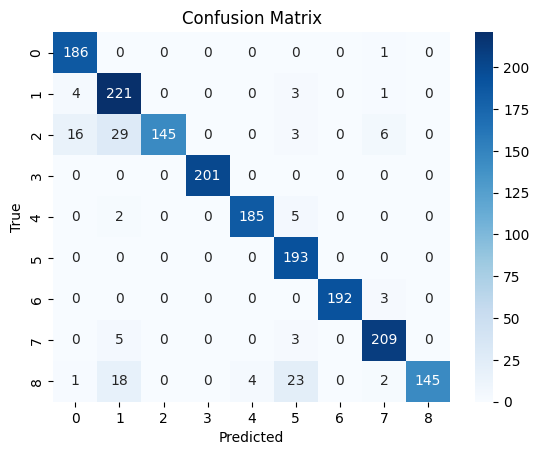

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       187
           1       0.80      0.97      0.88       229
           2       1.00      0.73      0.84       199
           3       1.00      1.00      1.00       201
           4       0.98      0.96      0.97       192
           5       0.84      1.00      0.91       193
           6       1.00      0.98      0.99       195
           7       0.94      0.96      0.95       217
           8       1.00      0.75      0.86       193

    accuracy                           0.93      1806
   macro avg       0.94      0.93      0.93      1806
weighted avg       0.94      0.93      0.93      1806



In [ ]:
# Confusion Matrix ve Classification Report
y_pred = initial_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = x_test.classes

conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_classes, y_pred_classes))

In [ ]:
# Test verisini kopyalayıp predict_data adında yeni bir DataFrame oluşturulur
predict_data = test_data.copy()

# Boş bir labels sözlüğü tanımlanır

# Mevcut sınıf indekslerini tersine çevirerek (indeks -> sınıf etiketi) labels sözlüğüne eklenir
for l,v in x_test.class_indices.items():
    labels.update({v:l})

# Modelin tahmin ettiği sınıf indekslerini 'pred' adlı bir sütuna atılır
predict_data['pred'] = y_pred_classes

# Tahmin edilen sınıf indekslerini sınıf etiketlerine çevrilir
predict_data['pred'] = predict_data['pred'].apply(lambda x: labels[x])

In [ ]:
# DataFrame'in indekslerini sıfırlanır ve eski indeksleri korumadan (drop=True) yeni bir sıralı indeks oluşturulur
predict_data = predict_data.reset_index(drop=True)

# İlk 10 satırı görüntüler, tahmin edilen sonuçları kontrol etmek için
predict_data.head(10)

,path,label,pred
0,/content/drive/MyDrive/ColabNotebooks/fishClas...,Red Sea Bream,Red Sea Bream
1,/content/drive/MyDrive/ColabNotebooks/fishClas...,Gilt-Head Bream,Gilt-Head Bream
2,/content/drive/MyDrive/ColabNotebooks/fishClas...,Shrimp,Shrimp
3,/content/drive/MyDrive/ColabNotebooks/fishClas...,Striped Red Mullet,Striped Red Mullet
4,/content/drive/MyDrive/ColabNotebooks/fishClas...,Sea Bass,Sea Bass
5,/content/drive/MyDrive/ColabNotebooks/fishClas...,Black Sea Sprat,Black Sea Sprat
6,/content/drive/MyDrive/ColabNotebooks/fishClas...,Hourse Mackerel,Gilt-Head Bream
7,/content/drive/MyDrive/ColabNotebooks/fishClas...,Striped Red Mullet,Striped Red Mullet
8,/content/drive/MyDrive/ColabNotebooks/fishClas...,Sea Bass,Sea Bass
9,/content/drive/MyDrive/ColabNotebooks/fishClas...,Gilt-Head Bream,Gilt-Head Bream


In [ ]:
# Gerçek etiketler ('label') ile tahmin edilen etiketler ('pred') eşleşmeyen satırları filtreleyip gösterir
# Bu sayede modelin yanlış sınıflandırdığı verileri gözükür

predict_data[predict_data['label']!=predict_data['pred']]

,path,label,pred
6,/content/drive/MyDrive/ColabNotebooks/fishClas...,Hourse Mackerel,Gilt-Head Bream
14,/content/drive/MyDrive/ColabNotebooks/fishClas...,Trout,Gilt-Head Bream
21,/content/drive/MyDrive/ColabNotebooks/fishClas...,Gilt-Head Bream,Sea Bass
34,/content/drive/MyDrive/ColabNotebooks/fishClas...,Red Sea Bream,Sea Bass
36,/content/drive/MyDrive/ColabNotebooks/fishClas...,Trout,Sea Bass
...,...,...,...
1757,/content/drive/MyDrive/ColabNotebooks/fishClas...,Striped Red Mullet,Gilt-Head Bream
1769,/content/drive/MyDrive/ColabNotebooks/fishClas...,Hourse Mackerel,Gilt-Head Bream
1774,/content/drive/MyDrive/ColabNotebooks/fishClas...,Trout,Sea Bass
1790,/content/drive/MyDrive/ColabNotebooks/fishClas...,Hourse Mackerel,Gilt-Head Bream
